<center>**Machine Learning 1 - Professor Dr. Yuxiao Huang** </center>
<center>**Christian Braz - Toufik Bouras** </center>
<center>Data Science, Columbian College of Arts & Sciences </center>
<center>George Washington University </center>

# Introduction 

In this article we are going to discuss our work on predicting House Prices. This is a classic regression problem in which we aim to predict the selling price of a house given its attributes. The motivation in doing such analysis is to provide real estate firms accurate information about expected values of properties. After creating the seven models, we conduct an evaluation of each model by comparing its accuracy. This work is organized in the following way: 

1. Methodology
1. Understanding and cleaning the data
1. Regression Models
 1. Linear Regression
     1. Ordinary Least Squares
     1. Ridge
     1. Lasso
     1. Elastic Net
 1. Suport Vector Machine
 1. Neural Network
 1. Random Forests  
1. Discussion


# Methodology


As we are dealing with a regression problem, an appropriate metric is the Root Mean Squared Error or RMSE. The methodology we followed is:

* Each method trained using 5-fold cross-validation.
* Final RMSE is calculated based on the average results of all training steps.   

Using cross-validation is a common way to assess the predictive performance of the models and to judge how they perform outside the sample (and assess their generalization strength).  


# Understanding and cleaning the data

As mentioned by several authors, much of the work in making a good model is contingent on a good feature preparation process. This phase encompasses tasks such as: cleaning, feature mapping, feature selection, and feature scaling. In this section we describe the steps we did to get a better understanding of the data and to make it more appropriate for modeling analysis.


## The data set

The house prices [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) 
has 81 features and the objective is to predict SalePrice. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
    
df = pd.read_csv("train.csv",na_values=['?',''],delimiter=',',delim_whitespace=False)
data_aux = df

## Exploring the dataset

Understanding the data is an important part of our project. The more we understand the data the more we will have the ability to accuratley select and manupilate the features to get the best possible results. In this section we explore possible correlations between the dependent and the independent variables (Figure 1). Linear regression models are sensitive to non-linearity, outliers and colinearity, so we are going also to check these potential problems. 

### Correlation Matrix

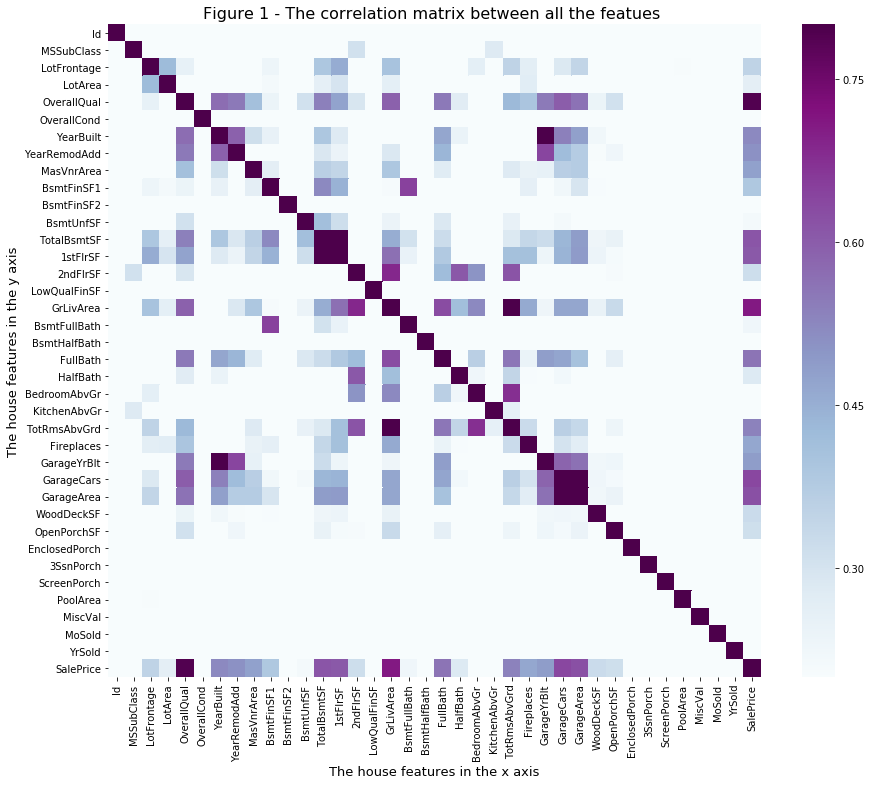

In [2]:
# Correlation Matrix all features
correlation_matrice = data_aux.corr()
f, ax = plt.subplots( figsize=(15, 12))
sns.heatmap(correlation_matrice,vmin=0.2, vmax=0.8, square= True, cmap= 'BuPu')
plt.xlabel('The house features in the x axis',fontsize= 13)
plt.ylabel('The house features in the y axis',fontsize= 13)
plt.title('Figure 1 - The correlation matrix between all the featues ', fontsize= 16);


We can notice that some variables are strongly correlated with SalePrice. Specifically, these six features : OverallQual, GrlivArea, TotalBsmtSF, 1stFLrSF, GarageCars, and GrageArea. Moreover, some variables are strongly correlated with each other which means that we might have a multicollinearity. Subsequently, we need to take them into consideration when selecting and preparing the features to use in our modelling. For example there is a strong correlation between Yearbuilt and GarageYrBlt which means that most Garages are built in the same time with the construction of the houses.Therefeore,we can consider that Yearbuilt and GarageYrBlt as the same variable.
The correlation matrix shows only the value of the correlation but it doesn't reveal the nature of the correaltion. On the other hand scatter or some other charts can show the nature of the correlation whether it is linear or has another shape.

### Scatter plot of the most correlated features with SalePrice

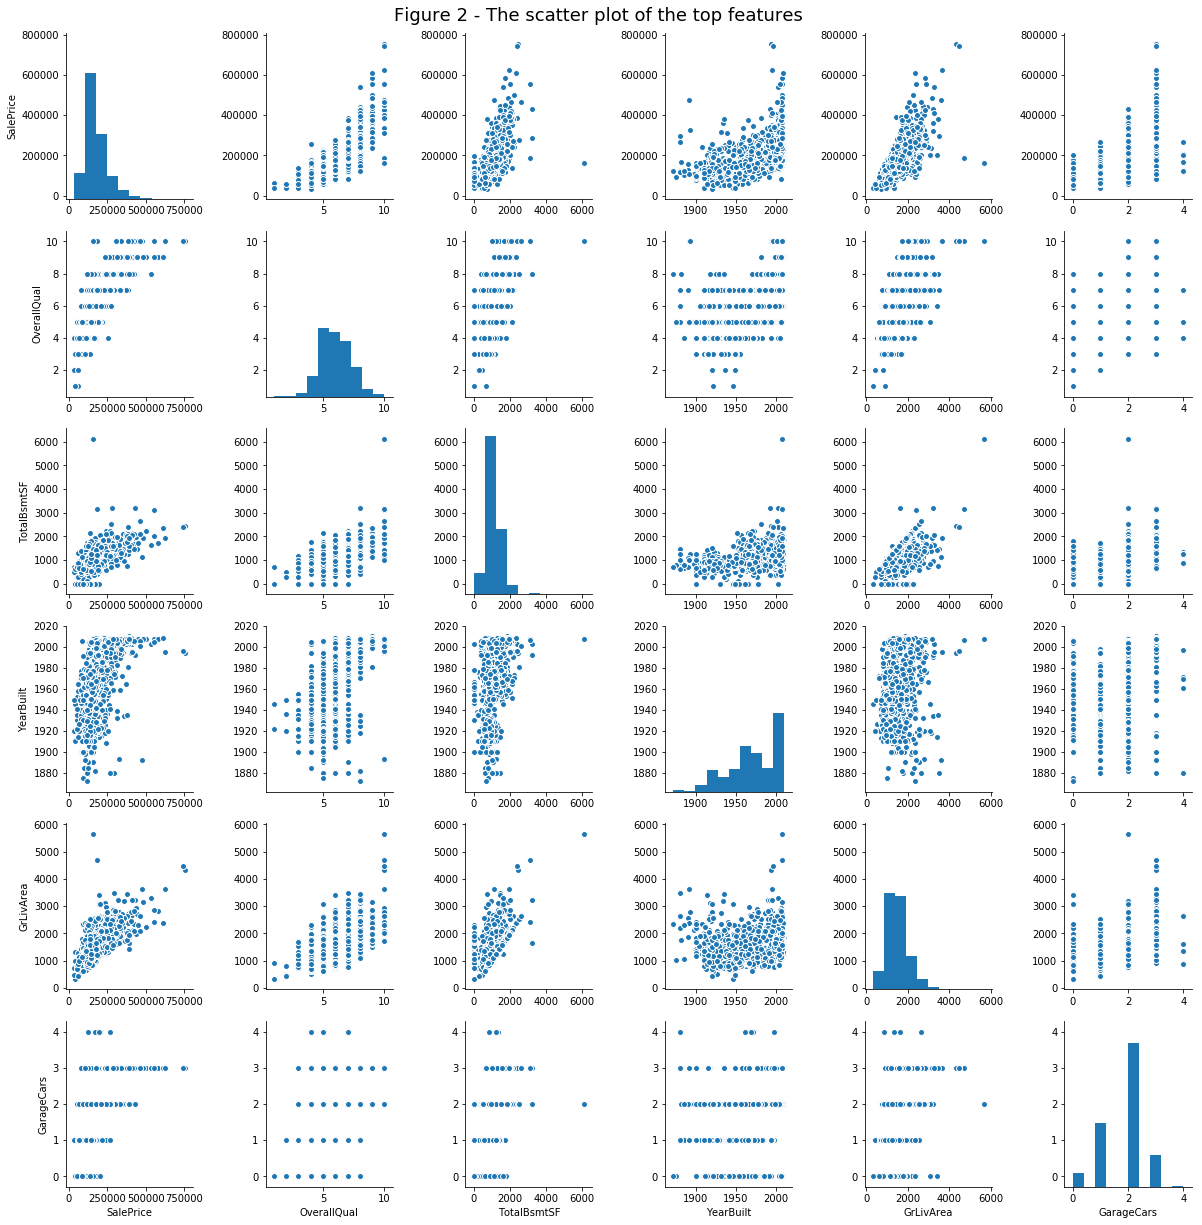

In [3]:
#Scatter plot of thr most important features
cols = ['SalePrice', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'GrLivArea', 'GarageCars']
sns.pairplot(data_aux[cols], size = 2.8)
plt.suptitle('Figure 2 - The scatter plot of the top features ',x=0.5, y=1.01, verticalalignment='top', fontsize= 18)
plt.tight_layout()
plt.show();


Figure 2 shows that there are two plots wich exhibit some kind of outliers: TotalBamtSF and GrLivArea. So we need to take a close look into them and decide whether we have outliers or not.

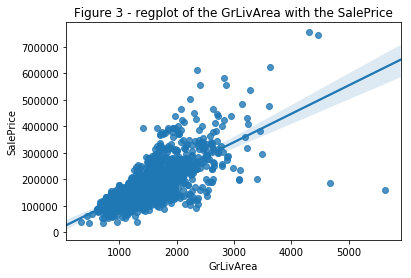

In [4]:
# regplot of GrLivArea/SalePrice

ax = sns.regplot(x=data_aux['GrLivArea'], y=data_aux['SalePrice'])
plt.ylabel('SalePrice', fontsize= 10)
plt.xlabel('GrLivArea', fontsize= 10)
plt.title('Figure 3 - regplot of the GrLivArea with the SalePrice', fontsize= 12)
plt.show();

In Figure 3 it is Obvious that there are two points which can be considered as outliers. At thses points the ground living area is large but the sale price is low which is not logical. So we are going to remove them.

In [5]:
# Removing the outliers
# We sort the values by GrLivArea and select the two lager values, and we locate the index number 
# to use it in order to drop corresponding rows.
g_out = data_aux.sort_values(by="GrLivArea", ascending = False).head(2)
g_out
data_aux.drop([523,1298], inplace = True)
data_aux.reset_index(inplace=True)


Next we are going to check the regplot of TotalBsmtSF and SalePrice in Figure 4.

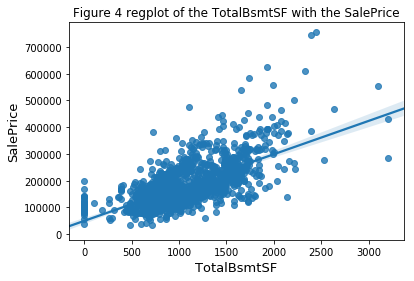

In [6]:
# regplot of TotalBsmtSF/SalePrice

ax = sns.regplot(x=data_aux['TotalBsmtSF'], y=data_aux['SalePrice'])
plt.ylabel('SalePrice', fontsize= 13)
plt.xlabel('TotalBsmtSF', fontsize= 13)
plt.title('Figure 4 regplot of the TotalBsmtSF with the SalePrice', fontsize= 12);
plt.show()

Generally speaking there aren't obvious outliers, which is great because we don't need to delete more rows.

## Missing values

Maybe the most common problem in real datasets is the missing values. Sometimes, instead of a blank space, a wildcard is used like '?' or 'NA'. In this project, in addition to the missing values we also have some 'NAs' used to denote the absence of features. To solve this issue, whenever appropriate we replace 'NA' by the value 'No'. Here is an example of an NA used instead of the absence to an alley access:
  
```
    Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

```

In [7]:
print("Shape of training set: ", df.shape)
print("Missing values before remove NA: ")
print(data_aux.columns[data_aux.isnull().any()])

Shape of training set:  (1458, 82)
Missing values before remove NA: 
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


As explained in the data set dictionary, for a set of features NA means "No" or "0". For exmple, for a house which does not have a Fence we would find "NA" as its fence value. So, for these categorical variables we replace NA by No whenever appropriate.

In [8]:
#Alley
data_aux.Alley.fillna(inplace=True,value='No')
#BsmtQual
data_aux.BsmtQual.fillna(inplace=True,value='No')
#BsmtCond
data_aux.BsmtCond.fillna(inplace=True,value='No')
#BsmtExposure
data_aux.BsmtExposure.fillna(inplace=True,value='No')
#BsmtFinType1
data_aux.BsmtFinType1.fillna(inplace=True,value='No')
#BsmtFinType2
data_aux.BsmtFinType2.fillna(inplace=True,value='No')
#FireplaceQu
data_aux.FireplaceQu.fillna(inplace=True,value='No') 
#GarageType
data_aux.GarageType.fillna(inplace=True,value='No')
#GarageFinish
data_aux.GarageFinish.fillna(inplace=True,value='No')
#GarageQual 
data_aux.GarageQual.fillna(inplace=True,value='No')    
#GarageCond
data_aux.GarageCond.fillna(inplace=True,value='No')
#PoolQC
data_aux.PoolQC.fillna(inplace=True,value='No')    
#Fence
data_aux.Fence.fillna(inplace=True,value='No')
#MiscFeature
data_aux.MiscFeature.fillna(inplace=True,value='No')
    
print("Missing values after insert No, i.e., real missing values: ")
print(data_aux.columns[data_aux.isnull().any()])


Missing values after insert No, i.e., real missing values: 
Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')


For the numeric features, we imputed each missing value with a zero. We did this because mostly the missing value means that the house does not have that feature.

In [9]:
#Numeric fields    
data_aux.BsmtFinSF1.fillna(inplace=True,value=0)
data_aux.BsmtFinSF2.fillna(inplace=True,value=0)
data_aux.BsmtUnfSF.fillna(inplace=True,value=0)
data_aux.TotalBsmtSF.fillna(value=0,inplace=True)
data_aux.BsmtFullBath.fillna(inplace=True,value=0)
data_aux.BsmtHalfBath.fillna(inplace=True,value=0)
data_aux.GarageCars.fillna(value=0,inplace=True)
data_aux.GarageArea.fillna(value=0,inplace=True)
data_aux.LotFrontage.fillna(inplace=True,value=0)
data_aux.GarageYrBlt.fillna(inplace=True,value=0)
data_aux.MasVnrArea.fillna(inplace=True,value=0)
    

For some categorical features we used an interpolation technique, inserting the mode of each column. For these features the dataset description didn't mention anything about the missig values, so they are indeed missing so we needed to decide how to fill them. The most appropriate way to do that in our case is to replace NAs with the mode.

In [10]:
#####Categorial fields
#KitchenQual
data_aux.KitchenQual = data_aux.KitchenQual.mode()[0]
#Functional
data_aux.Functional = data_aux.Functional.mode()[0]
#Utilities
data_aux.Utilities = data_aux.Utilities.mode()[0]  
#SaleType
data_aux.SaleType  = data_aux.SaleType.mode()[0]
#Exterior1st- nao posso remover linhas do teste
data_aux.Exterior1st = data_aux.Exterior1st.mode()[0]
#Exterior2nd
data_aux.Exterior2nd = data_aux.Exterior2nd.mode()[0]       
#Electrical - remove the records where the value is NA
data_aux.Electrical = df['Electrical'].mode()[0]
#MSZoning   - tem NA apenas na base de teste. Como nao posso remover linhas removo a coluna   
data_aux.MSZoning = data_aux.MSZoning.mode()[0]
#MasVnrType - remove the records where the value is NA 
data_aux.MasVnrType=df['MasVnrType'].mode()[0]
print("After we imputed the missing values, the status of the data set is: ")
print(data_aux.columns[data_aux.isnull().any()])



After we imputed the missing values, the status of the data set is: 
Index([], dtype='object')


We can see that there are no missing values. 




## Encoding

Encoding is important to deal properly with different types of values: nominal, ordinal and numeric. In the house prices data set we can find all of them. Here is an example of ordinal feature:

```
ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
```

Thus, we are going to perform the following steps:

* Mapping the ordinal fields which are strings to the corresponding meaningful codes.
* Transforming numeric categorical features to string.
* Applying one-hot encoding. 


In [11]:
#Mapping ordinal features

#LotShape: General shape of property
lotshape_map = {'Reg':'8','IR1':'6','IR2':'4','IR3':'2'}
data_aux.LotShape = data_aux.LotShape.map(lotshape_map)
data_aux.LotShape = data_aux.LotShape.astype('int64')

#Utilities: Type of utilities available       
utilities_map = {'AllPub':'8','NoSewr':'6','NoSeWa':'4','ELO':'2'}
data_aux.Utilities = data_aux.Utilities.map(utilities_map)
data_aux.Utilities = data_aux.Utilities.astype('int64')
    
#LandSlope: Slope of property
landslope_map = {'Gtl':'6','Mod':'4','Sev':'2'}
data_aux.LandSlope = data_aux.LandSlope.map(landslope_map)
data_aux.LandSlope = data_aux.LandSlope.astype('int64')

#ExterQual: Evaluates the quality of the material on the exterior 
quality_map = {'Ex':'10','Gd':'8','TA':'6','Fa':'4','Po':'2','No':'0'}
data_aux.ExterQual = data_aux.ExterQual.map(quality_map)
data_aux.ExterQual = data_aux.ExterQual.astype('int64')

#ExterCond: Evaluates the present condition of the material on the exterior
data_aux.ExterCond = data_aux.ExterCond.map(quality_map)
data_aux.ExterCond = data_aux.ExterCond.astype('int64')

#BsmtQual: Evaluates the height of the basement
data_aux.BsmtQual = data_aux.BsmtQual.map(quality_map)
data_aux.BsmtQual = data_aux.BsmtQual.astype('int64')

#BsmtCond: Evaluates the general condition of the basement
data_aux.BsmtCond = data_aux.BsmtCond.map(quality_map)
data_aux.BsmtCond = data_aux.BsmtCond.astype('int64')

#HeatingQC: Heating quality and condition
data_aux.HeatingQC = data_aux.HeatingQC.map(quality_map)
data_aux.HeatingQC = data_aux.HeatingQC.astype('int64')
        
#KitchenQual: Kitchen quality
data_aux.KitchenQual = data_aux.KitchenQual.map(quality_map)
data_aux.KitchenQual = data_aux.KitchenQual.astype('int64')

#FireplaceQu: Fireplace quality
data_aux.FireplaceQu = data_aux.FireplaceQu.map(quality_map)
data_aux.FireplaceQu = data_aux.FireplaceQu.astype('int64')

#GarageFinish: Interior finish of the garage
garage_map = {'Fin':'6', 'RFn':'4', 'Unf':'2', 'No':'0'}    
data_aux.GarageFinish = data_aux.GarageFinish.map(garage_map)
data_aux.GarageFinish = data_aux.GarageFinish.astype('int64')

#GarageQual: Garage quality
data_aux.GarageQual = data_aux.GarageQual.map(quality_map)
data_aux.GarageQual = data_aux.GarageQual.astype('int64')

#GarageCond: Garage condition
data_aux.GarageCond = data_aux.GarageCond.map(quality_map)
data_aux.GarageCond = data_aux.GarageCond.astype('int64')

#PoolQC: Pool quality
data_aux.PoolQC = data_aux.PoolQC.map(quality_map)
data_aux.PoolQC = data_aux.PoolQC.astype('int64')



In [12]:
#Converting numeric columns to nominal before applying one-hot encoding convertion
#After converting to String they will be treated as categorical

# MSSubClass as str
data_aux['MSSubClass'] = data_aux['MSSubClass'].astype("str")
# Year and Month to categorical
data_aux['YrSold'] = data_aux['YrSold'].astype("str")
data_aux['MoSold'] = data_aux['MoSold'].astype("str")    

In [13]:
#Converting from str to int of ordinal fields
data_aux.OverallCond = data_aux.OverallCond.astype("int64")
data_aux.OverallQual = data_aux.OverallQual.astype("int64")
data_aux['KitchenAbvGr'] = data_aux['KitchenAbvGr'].astype("int64")

In [14]:
#Finally, applying one-hot encoding

data_train = pd.get_dummies(data_aux)
print("New  shape after one-hot encoding:" , np.shape(data_train))




New  shape after one-hot encoding: (1458, 229)


We now have a new data set with no missing values and a well defined set of features. As expected, after the one-hot encoding process we jumped from 81 to 229 features.

### Transforming non-linear data into linear data

We are going to start with verifying whether the data is linear or not. To do this in a multiple linear regression model we plot the residuals against the predicted values. The results are shown in
Figure 5. 

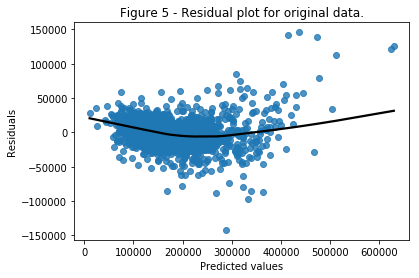

Mean square error:  492970222.921


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import statsmodels.api as sm

x_train = data_train.drop('SalePrice',axis=1)
y_train = data_train['SalePrice']

scaler = preprocessing.StandardScaler()
x_train_s = scaler.fit_transform(x_train)   

linear1 = LinearRegression()
linear1.fit(x_train_s, y_train)
pred = linear1.predict(x_train_s)
ax = sns.regplot(x=pred,y=y_train-pred,lowess=True,line_kws={"color":"black"})
ax.set_title('Figure 5 - Residual plot for original data.')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
plt.show();

print("Mean square error: ",sum(np.power((y_train-pred),2))/x_train.shape[0])

#results = sm.OLS(y_train,x_train_s).fit()
#print(results.summary())

We can note some evidence of non-linearity and also a fairly high error. Hence, as recommended by the specilailists, we applied log transformation on the dependent variable SalesPrice. The new result is shown in Figure 6.


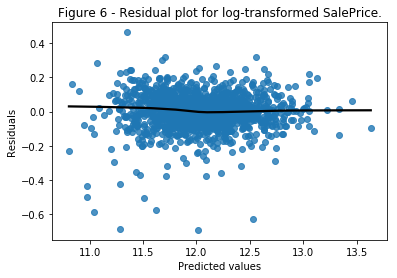

Mean square error:  0.0101646358751


In [16]:
linear2 = LinearRegression()
linear2.fit(x_train_s, np.log1p(y_train))
pred = linear2.predict(x_train_s)
ax = sns.regplot(x=pred,y=np.log1p(y_train)-pred,lowess=True,line_kws={"color":"black"})
ax.set_title('Figure 6 - Residual plot for log-transformed SalePrice.')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')
plt.show()
print("Mean square error: ",sum(np.power((np.log1p(y_train)-pred),2))/x_train.shape[0])


data_train['SalePrice'] = np.log1p(data_train.SalePrice)

As a result of applying a log transformation on the values of SalePrice, we get a much more linear residual plot and a impressive decline in the mean square error.


### Engineering new features

By Analyzing the data we can observe that there is no feature with the total size of the house. This information can be obtained from other variables, specificaly from: TotalBsmtSF, 1stFlrSF, 2ndFlrSF and GarageArea. Hence, it seems to be a good idea to create new feature (TotalSF) with this information. 

In [17]:
data_train['TotalSF'] = data_train['TotalBsmtSF'] + data_train['1stFlrSF'] + data_train['2ndFlrSF'] + data_train['GarageArea']

## Feature selection

Feature selection is the task of trying to discover the smallest set of features highly correlated with the dependent variable. It is important for the interpretability of the model but also to get a better fit, and consequently a better performance. We employed an automatic feature selection technique using a tree-based learning algorithm, and then used the tree structure produced to select the best features.  

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_selection import SelectFromModel
from tabulate import tabulate

#Tree-based feature selection
y_train = (data_train['SalePrice'])
x_train = (data_train.drop('SalePrice',axis=1))

#clf = ExtraTreesRegressor(random_state=0,n_estimators=1400)
clf = RandomForestRegressor(n_estimators=1400, criterion='mse', 
                max_depth=None, min_samples_split=2, min_samples_leaf=1,
                min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                oob_score=False, n_jobs=1, random_state=0, verbose=0, warm_start=False)

clf = clf.fit(x_train,y_train)

#Organinzing the features selected for visualization
pd.set_option('display.max_columns', None)#to print all the columns of a data frame
data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = clf.feature_importances_
data = data.T.sort_values(data.index[0], ascending=False).T
print("Ten most important features selected with tree-based selection: \n")
print(tabulate(data.iloc[:,0:5],headers='keys', tablefmt='psql'))
print(tabulate(data.iloc[:,6:11],headers='keys', tablefmt='psql'))

#Select the features based on the threshold
model = SelectFromModel(clf, prefit=True,threshold=1e-3)
#Reduce data to the selected features.
aux = model.transform(x_train)

print("\n New shape for train after tree-based feature selection: {}".format(aux.shape))
data_train_less_features_aux = pd.DataFrame(aux)
data_train_less_features_aux.columns = [data.columns[i] for i in range(0,aux.shape[1]) ]
print("\n Features selected :")
print(data_train_less_features_aux.columns)
data_train_less_features = pd.concat([data_train_less_features_aux,pd.DataFrame(y_train)],axis=1)

print("\n End of the process of selecting best features. \n")

Ten most important features selected with tree-based selection: 

+----+-----------+---------------+-------------+----------------+-----------+
|    |   TotalSF |   OverallQual |   YearBuilt |   YearRemodAdd |   LotArea |
|----+-----------+---------------+-------------+----------------+-----------|
|  0 |  0.547792 |      0.243313 |   0.0193983 |      0.0187881 | 0.0122713 |
+----+-----------+---------------+-------------+----------------+-----------+
+----+-------------+-------------+--------------+------------+------------+
|    |   GrLivArea |   BsmtUnfSF |   BsmtFinSF1 |   1stFlrSF |   BsmtQual |
|----+-------------+-------------+--------------+------------+------------|
|  0 |   0.0105283 |  0.00862509 |   0.00770424 | 0.00651909 | 0.00542328 |
+----+-------------+-------------+--------------+------------+------------+

 New shape for train after tree-based feature selection: (1458, 41)

 Features selected :
Index(['TotalSF', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'LotArea',


The final process resulted in 40 features. It is important to note that the field we created before **TotalSF** was chosen as one of the most relevant feature. 

## Feature scaling

Our last step in the pre-processing phase would be standardizing the data. This will be usefull for all the models. As we are using cross-validation, the scaling has to be done independently for the training and the testing sets.

# Regression Models

In this section we are going to present the evaluation of different scikit-learn modeling algorithms. We aim to mesure the performence of each model and compare it with the other models.

In [19]:
#Some usefull packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split


#Python dictionary to collect the results
RMSE_results = {
    
    'LinearRegression':0.0,
    'Lasso':0.0,
    'Ridge':0.0,
    'ElasticNet':0.0,
    'SVM':0.0,
    'NN':0.0,    
    'RF':0.0
    
}



## Linear Regression

In this section we are going to experiment with a set of regression methods in which the target value is expected to have a linear relationship with the input variables. 

###  Ordinary Least Squares

Least Square Error is a well known mathematical measure of the performance of a linear regression model. LSE works by changing the coefficients of the model in a way that minimize the sum of squares between the true values and the predicted values. It solves a problem of the form:   $\underset{w}{min\,} {|| X w - y||_2}^2$ 
and can be solved analyticaly by the equation

$$\hat\beta=(X^TX)^{-1}X^Ty$$

Where X is a matrix of the independents features, y is the actual response and $\hat\beta$ the estimated weights w. 

In [20]:
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Lasso, LassoCV, ElasticNetCV
from sklearn import preprocessing


x_train = data_train_less_features.drop('SalePrice',axis=1).values
y_train = data_train_less_features['SalePrice'].values



print("Linear Regression \n")

#Cross validation
classifierLinearRegression = LinearRegression(fit_intercept=True, normalize=False,
                                              copy_X=True, n_jobs=1)
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    x_train_fold = scaler.fit_transform(x_train[training,:])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]
    
    classifierLinearRegression = classifierLinearRegression.fit(x_train_fold, y_train_fold)
    pred = classifierLinearRegression.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['LinearRegression'] = score

Linear Regression 


 Average RMSE: 0.12352798289953427


## Ridge

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The new equation of a penalized residual sum of square is $\underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}$.

Here, $\alpha \geq 0$ is called the regularization parameter (L2) and controls the amount of shrinkage. Higher the values of alpha, bigger is the penalty and therefore the magnitude of coefficients are reduced. It is worth to note that we used RidgeCV which does an implicit leave-one-out cross-validation to choose the best alpha. 

In [21]:
print("Ridge \n\n")

classifier = RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, 
                     scoring=None, cv=None, gcv_mode=None, store_cv_values=False)

kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1
    pred = []
    
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]

    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        


cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['Ridge'] = score

Ridge 



 Average RMSE: 0.12330292068107444


## Lasso

The Mathematics behind lasso regression is quiet similar to that of ridge. the only difference is instead of adding squares of theta, we add the absolute value of w: $\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$. Lasso is a linear model that estimates sparse coefficients, i.e., it reduces the number of variables upon which the given solution is dependent. It does a kind of feature selection and thus lead to a less complex final model. For instance, when there are correlated features it will choose one and set the coefficient of the other to zero. The regularization parameter alpha (L1) controls the degree of sparsity of the coefficients estimated and we employed once more the version of the algorithm that automatically chooses the best value.  


In [22]:
print("Lasso \n\n")

classifier = LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
                     normalize=False, precompute='auto', max_iter=1000, tol=0.0001, 
                     copy_X=True, cv=None, verbose=False, n_jobs=1, positive=False,
                     random_state=None, selection='cyclic')

kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1
    pred = []
    
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]
        
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        


cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['Lasso'] = score

Lasso 



 Average RMSE: 0.12390289951654518


## Elastic Net

Is a hybrid method that trains with L1 and L2 as regularizers. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. It is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while Elastic Net is likely to pick both. The objective function to minimize is in this case

$$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$$



In [23]:
print("Elastic Net \n\n")

classifier = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None,
                          fit_intercept=True, normalize=False, precompute='auto', 
                          max_iter=1000, tol=0.0001, cv=None, copy_X=True, verbose=0, 
                          n_jobs=1, positive=False, random_state=None, selection='cyclic')

kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1
    pred = []   
        
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
RMSE_results['ElasticNet'] = score

Elastic Net 



 Average RMSE: 0.12379041525319807


Let's compare the results we have got so far. From Figure 7 we can observe that all methods have a fairly similar performance. OLS and Ridge have slight lower RMSE. In any case, it seems that regularization is not an issue for this particular problem. All the models were trained using their default parameter values. 

Text(0.5,0,'Models')

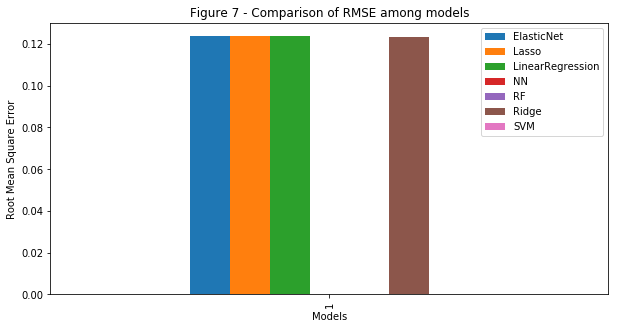

In [24]:
fig_1 = pd.DataFrame(RMSE_results, index=(1,) )
ax = fig_1.plot(kind='bar',figsize=(10,5), title="Figure 7 - Comparison of RMSE among models")
ax.set_ylabel('Root Mean Square Error')
ax.set_xlabel('Models')


## Support Vector Machine

SVM is a large margin classifier. The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error. Whereas, models with small margins are more
prone to overfitting. We can control the width of the margin using the regularization parameter C. Lower values of C give smaller margins and vice versa. 

We have used the linear kernel as it gave far the best result when comparing to rbf or sigmoid. It is a sign that a linear fit is well adjusted to the true data and also can explain that no regularization was necessary. The best value for C was 1. We kept the other parameters in their default values.

In [25]:
from sklearn.svm import SVR
print("SVM")

classifierSVR = SVR(kernel='linear', degree=3, gamma='auto', coef0=0.0, tol=0.001,
                    C=1.0, epsilon=0.1, shrinking=True, cache_size=200,
                    verbose=False, max_iter=-1) 

kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    pred = []
        
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = (y_train[training])    
    y_test_fold = (y_train[test])
    
    classifierSVR = classifierSVR.fit(x_train_fold, y_train_fold)
    pred = classifierSVR.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        


cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    

RMSE_results['SVM'] = score

SVM

 Average RMSE: 0.12539720824278738


## Multilayer Perceptron

Multi-layer Perceptron (MLP) is a supervised learning algorithm. Given a set of features X = {x_1, x_2, ..., x_m} and a target y, it can learn a non-linear function for either classification or regression. 

The class we are using in our work is the MLPRegressor which implements a multi-layer perceptron that trains using backpropagation with no activation function in the output layer (uses the identity function as activation function). Therefore, it uses the square error as the loss function, and the output is a set of continuous values.

A one hidden layer MLP has a function in the form:$$f : R^D -> R^L$$ where D is the size of input vector x, and L is the size of the output vector f(x). 

We think this model the most difficult to find a good adjustment of complexity. We have tested some configurations and the best set of parameters was: learning rate of 0.001, a ReLu activation function for the hidden layers as this can speed up the learning process, a small value for the regularization parameter alpha of 0.0001 which means an agressive regularization and a net of three hidden layers with 80, 50 and 20 neurons respectively. Even so, it was not enough to get comparable results with the other models. 

In [39]:
from sklearn.neural_network import MLPRegressor

print("\nNeural Network")


classifier = MLPRegressor( hidden_layer_sizes=(80,50,20), activation='relu',solver='adam', 
                          alpha=1e-3, batch_size='auto', learning_rate='constant', 
                          learning_rate_init=0.001, power_t=0.5, max_iter=200, 
                          shuffle=True, random_state=7, tol=0.0001, 
                          verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                          early_stopping=False, validation_fraction=0.1, beta_1=0.9,
                          beta_2=0.999, epsilon=1e-08)

kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1    
    pred = []
    
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]

    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

   
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    

RMSE_results['NN'] = score


Neural Network

 Average RMSE: 0.7254126422928299


## Random Forest

Random Forest is one of the most versatile and precise classifier. It does not need the data being scaled and can deal with any number of features. In order to test the random forest algorithm a little further than the others, we decided to train it using different train sets. First, with a data set containing all the features and no scaling. Second, in the reduced train set with scaled features. 

As we can see in the results bellow, it did well in both cases. This test was also interesting to validate our set of selected features. Seems they are really good options once the performance using the the full set is not significatively better than using the restricted set. 

After some experimentation, the configuration we chose was: the number of trees is 500 as any greater value did not enhance the accuracy, MSE as the function to measure the quality of a split, max_depth with None which means the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples, max_features = auto to consider all the features when looking for the best split and bootstrap = True for replacement as it gave better results during the tests. All the others parameters were maintained in their default values.   

In [69]:
##Random Forests
from sklearn.ensemble import RandomForestRegressor

print("\n Random Forests ")
print("\n Full Features ")

y_train_rf = data_train['SalePrice'].values
x_train_rf = data_train.drop('SalePrice',axis=1).values

classifierAllFeatures = RandomForestRegressor(n_estimators=500, criterion='mse', 
                max_depth=None, min_samples_split=2, min_samples_leaf=1,
                min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                oob_score=False, n_jobs=1, random_state=0, verbose=0, warm_start=False)

kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0

for training, test in kf.split(x_train_rf):
    fold+=1
    pred = []
        
    x_train_fold = x_train_rf[training]
    y_train_fold = y_train_rf[training]
    x_test_fold = x_train_rf[test]
    y_test_fold = y_train_rf[test]
    
    classifierAllFeatures.fit(x_train_fold, y_train_fold)
    pred = classifierAllFeatures.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        


cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE using all features: {}".format(score))    


###########Less features
print("\n Less features ")

kf = KFold(n_splits=5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

classifierRF_lessFeatures = RandomForestRegressor(n_estimators=500, criterion='mse', 
                max_depth=None, min_samples_split=2, min_samples_leaf=1,
                min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                oob_score=False, n_jobs=1, random_state=0, verbose=0, warm_start=False)

for training, test in kf.split(x_train):
    fold+=1
    pred = []
    
    scaler = preprocessing.StandardScaler()
    x_train_fold = scaler.fit_transform(x_train[training])
    x_test_fold = scaler.transform(x_train[test])

    y_train_fold = y_train[training]    
    y_test_fold = y_train[test]
    
    classifierRF_lessFeatures.fit(x_train_fold, y_train_fold)
    pred = classifierRF_lessFeatures.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        
    
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE less features: {}".format(score))    

RMSE_results['RF'] = score


 Random Forests 

 Full Features 

 Average RMSE using all features: 0.1341187954172455

 Less features 

 Average RMSE less features: 0.13369220187027012


Done! We have tested seven different algorithms in the house prices prediction problem. Lets now compare the performance of each one (Figure 8). 

Text(0.5,0,'Models')

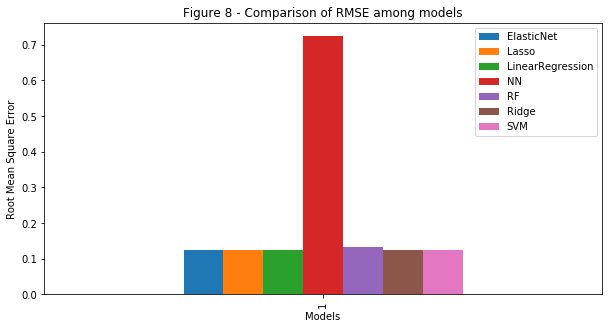

In [70]:
fig_1 = pd.DataFrame(RMSE_results, index=(1,) )
ax = fig_1.plot(kind='bar',figsize=(10,5), title="Figure 8 - Comparison of RMSE among models")
ax.set_ylabel('Root Mean Square Error')
ax.set_xlabel('Models')


# Discussion

Most models exhibited similar performance except for MLP. As this model has several parameters to set, a reasonable approach would be to do an extensive exploration for best values. As this can be a tedious and error prone task, one can make use of some automated search/evaluation process, like the GridSearch resource available in the scikit-learn package. 

Data preprocessing have been proven to be a crucial part of our work, for instance adressing the non-linearity problem with log transformation improved the performance dramatically. Moreover, removing the outliers also yield better results. Encoding the features according to their type: nominal, ordinal, and numerical is also critical to our work. 

One way of improving our results is creating an ordinal version of the location, because, as we know, location is quite important factor in most housing prices. We can also improve our model doing more feature engineering, as we did when we create the TotalSF, or doing more useful transformations such as Box-Cox or log transformation to other variables to reduce their variability. 

